## Load Tree Sequence from SLiM

In [9]:
import pyslim, tskit, msprime
import numpy as np

slim_ts = pyslim.load("/Users/ARIADNA/Desktop/spatial_sim.trees")

print(f'There are {slim_ts.num_individuals} individuals and {slim_ts.num_samples} sample genomes.')

There are 200 individuals and 400 sample genomes.


## Simplify

In [10]:
np.random.seed(3)
alive_inds = slim_ts.individuals_alive_at(0)
fab_five = np.random.choice(alive_inds, 5, replace=False)
keep_nodes = []
for i in fab_five:
    keep_nodes.extend(slim_ts.individual(i).nodes)
simple_ts = slim_ts.simplify(keep_nodes)

print (f"Individuals {fab_five} were selected.")

Individuals [93 67  6 64 96] were selected.


## Mutate

In [12]:
mutant_ts = pyslim.SlimTreeSequence(msprime.mutate(simple_ts, rate=1e-8, keep=True))
mutant_ts.dump("/Users/ARIADNA/Desktop/fabfive.recap.trees")

╔════════════════════════╗
║TreeSequence            ║
╠═══════════════╤════════╣
║Trees          │       1║
╟───────────────┼────────╢
║Sequence Length│ 10000.0║
╟───────────────┼────────╢
║Sample Nodes   │      10║
╟───────────────┼────────╢
║Total Size     │12.5 KiB║
╚═══════════════╧════════╝
╔═══════════╤════╤═════════╤════════════╗
║Table      │Rows│Size     │Has Metadata║
╠═══════════╪════╪═════════╪════════════╣
║Edges      │  18│508 Bytes│          No║
╟───────────┼────┼─────────┼────────────╢
║Individuals│   5│  1.8 KiB│         Yes║
╟───────────┼────┼─────────┼────────────╢
║Migrations │   0│  4 Bytes│          No║
╟───────────┼────┼─────────┼────────────╢
║Mutations  │   0│  1.2 KiB│          No║
╟───────────┼────┼─────────┼────────────╢
║Nodes      │  19│  1.3 KiB│         Yes║
╟───────────┼────┼─────────┼────────────╢
║Populations│   1│  2.8 KiB│         Yes║
╟───────────┼────┼─────────┼────────────╢
║Provenances│   2│  3.1 KiB│          No║
╟───────────┼────┼─────────┼───

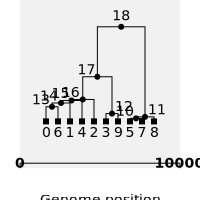

In [27]:
print(simple_ts)

from IPython.display import SVG
SVG(mutant_ts.draw_svg())

In [16]:
alive = slim_ts.individuals_alive_at(0)
alive_locs = slim_ts.individual_locations[alive, : ]

ff_locs = slim_ts.individual_locations[fab_five, : ]
ff_locs

array([[0.78639263, 0.58068143,        nan],
       [0.69859986, 0.74271037,        nan],
       [0.71401235, 0.73893232,        nan],
       [0.76667571, 0.93841398,        nan],
       [0.74735954, 0.8541277 ,        nan]])

## Plot Locations

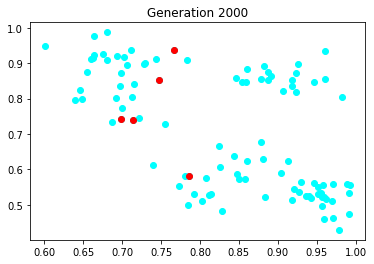

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x = alive_locs[:,0]
y = alive_locs [:,1]
plt.scatter(x,y, color = 'cyan')

x = ff_locs[:,0]
y = ff_locs[:,1]
plt.scatter(x,y, color = 'red')

plt.title("Generation 2000")
plt.show()

This scatter plot shows the locations of all extant individuals (cyan) and sampled individuals (red).

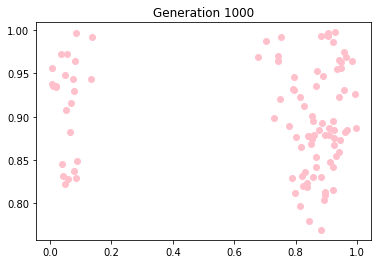

In [24]:
olds = slim_ts.individuals_alive_at(1000)
olds_locs = slim_ts.individual_locations[olds, : ]

x = olds_locs[:,0]
y = olds_locs [:,1]
plt.scatter(x,y, color = 'pink')

plt.title("Generation 1000")
plt.show()

This scatter plot shows the locations of all individuals at Generation 1000 (pink).

In [26]:
print(simple_ts.individual(0))

Individual(id=0, flags=65536, location=array([0.71401235, 0.73893232,        nan]), parents=array([], dtype=int32), nodes=array([4, 5], dtype=int32), metadata={'pedigree_id': 199906, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})


## Next Steps

Now, how do I find the ancestor(s) of the fab five that was alive in Generation 1000?

Ideas:
- look through the 19 nodes, find the one that occured in Generation 1000
- OR maybe extant individuals have a record of their ancestors? Probably not